## TF2 Fashion MNIST - Batch normalization

In [1]:
import numpy as np
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.5)
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

for gpu in tf.config.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(gpu, True)
    

tf_version = 'TF '+tf.__version__
print(tf_version)

TF 2.5.0


In [2]:
mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_val, y_val) = mnist.load_data()
X_train=X_train.reshape(-1,28,28,1)
X_val=X_val.reshape(-1,28,28,1)

print("Training   X:",X_train.shape, 'y:', y_train.shape)
print("Validation X:",X_val.shape, 'y:', y_val.shape)
print("X min:",np.min(X_train))
print("X max:",np.max(X_train))

X_train, X_val = X_train / 255.0, X_val / 255.0

print("After normalization:")
print("X min:",np.min(X_train))
print("X max:",np.max(X_train))

Training   X: (60000, 28, 28, 1) y: (60000,)
Validation X: (10000, 28, 28, 1) y: (10000,)
X min: 0
X max: 255
After normalization:
X min: 0.0
X max: 1.0


In [3]:
def getModelCNN():
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(8,(3,3), activation='relu',input_shape=(28, 28,1)),
                tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(10, activation='softmax')],name='CNN')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
def getModelCNNBN():
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(8,(3,3), activation='relu',input_shape=(28, 28,1)),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(10, activation='softmax')],name='BN')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def getModelCNNBN2():
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(8,(3,3), activation='relu',input_shape=(28, 28,1)),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(10, activation='softmax')],name='BN2')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


def getModelCNNLN():
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(8,(3,3), activation='relu',input_shape=(28, 28,1)),
                tf.keras.layers.LayerNormalization(),
                tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(10, activation='softmax')],name='LN')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def getModelCNNIN():
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(8,(3,3), activation='relu',input_shape=(28, 28,1)),
                tfa.layers.InstanceNormalization(),
                tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(10, activation='softmax')],name='IN')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def getModelCNNGN():
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(8,(3,3), activation='relu',input_shape=(28, 28,1)),
                tfa.layers.GroupNormalization(4),
                tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(10, activation='softmax')],name='GN')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [5]:
def vizualize_results(models,histories):
    plt.figure(figsize=(20,10))
    ax1=plt.subplot(121)

    srtd = sorted(zip(models,histories), key=lambda x: max(x[1].history['val_accuracy']))[::-1]
    for name, history in srtd:
        plt.plot(history.history['accuracy'], label=name+' %.1f%%'%(100*max(history.history['accuracy'])))
        plt.title('Training accuracy')
        plt.legend()
    plt.subplot(122, sharey=ax1)
    for name, history in srtd:
        plt.plot(history.history['val_accuracy'], label=name+' %.1f%%'%(100*max(history.history['val_accuracy'])))
        plt.title('Validation accuracy')
        plt.legend();

In [4]:
epochs=100
batch_size=128

histories=[]
models = [getModelCNN, getModelCNNBN, getModelCNNBN2, 
         getModelCNNLN,getModelCNNIN,getModelCNNGN]
model_names=[]
for m in models:
    model=m()
    model.summary()
    model_names.append(model.name)
    history = model.fit(X_train,
                        y_train,
                        epochs=epochs, batch_size=batch_size, validation_data=(X_val,y_val),verbose=0)
    del model
    histories.append(history)
vizualize_results(model_names,histories)

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       9344      
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                737290    
Total params: 746,714
Trainable params: 746,714
Non-trainable params: 0
_________________________________________________________________
Model: "BN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 8)         80        
_____________________________________________

NameError: name 'vizualize_results' is not defined

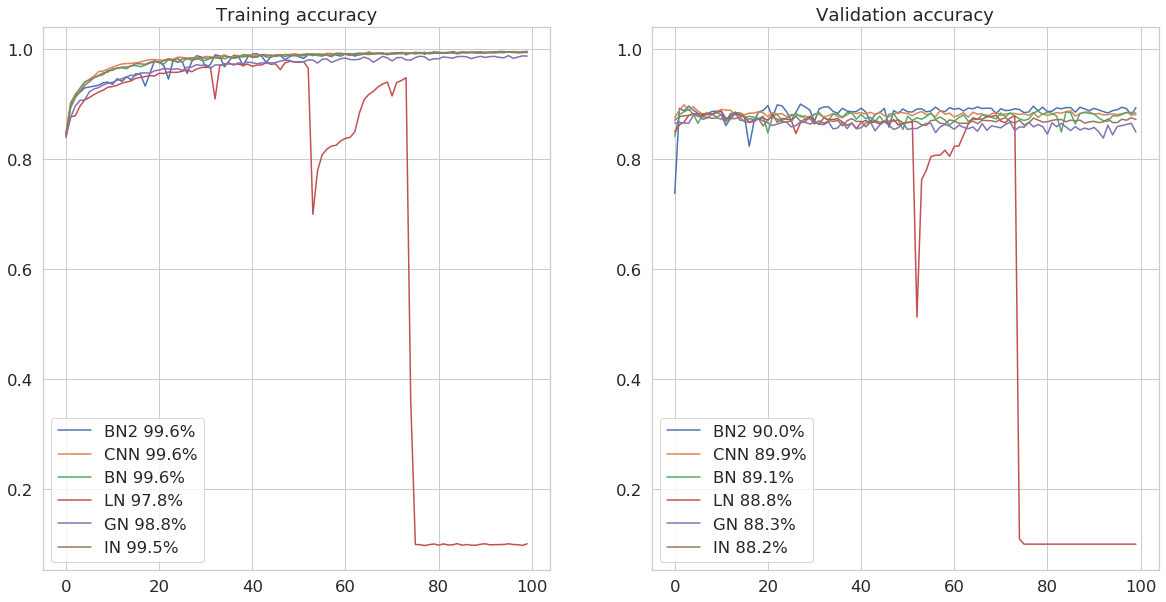

In [6]:
vizualize_results(model_names,histories)

# PyTorch

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.5)
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from tqdm import tqdm

In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 8, 3),
            nn.ReLU(),
            nn.Conv2d(8, 128, 3),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(73728, 10))

    def forward(self, x):
        x = self.model(x)
        output = F.log_softmax(x, dim=1)
        return output

class NetBN(nn.Module):
    def __init__(self):
        super(NetBN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 8, 3),
            nn.ReLU(),
            nn.BatchNorm2d(8),
            nn.Conv2d(8, 128, 3),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(73728, 10))

    def forward(self, x):
        x = self.model(x)
        output = F.log_softmax(x, dim=1)
        return output

class NetBN2(nn.Module):
    def __init__(self):
        super(NetBN2, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 8, 3),
            nn.ReLU(),
            nn.BatchNorm2d(8),
            nn.Conv2d(8, 128, 3),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Flatten(),
            nn.Linear(73728, 10))

    def forward(self, x):
        x = self.model(x)
        output = F.log_softmax(x, dim=1)
        return output
class NetLN(nn.Module):
    def __init__(self):
        super(NetLN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 8, 3),
            nn.ReLU(),
            nn.LayerNorm((8,26,26)),
            nn.Conv2d(8, 128, 3),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(73728, 10))

    def forward(self, x):
        x = self.model(x)
        output = F.log_softmax(x, dim=1)
        return output
class NetIN(nn.Module):
    def __init__(self):
        super(NetIN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 8, 3),
            nn.ReLU(),
            nn.InstanceNorm2d(8),
            nn.Conv2d(8, 128, 3),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(73728, 10))

    def forward(self, x):
        x = self.model(x)
        output = F.log_softmax(x, dim=1)
        return output
class NetGN(nn.Module):
    def __init__(self):
        super(NetGN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 8, 3),
            nn.ReLU(),
            nn.GroupNorm(4,8),
            nn.Conv2d(8, 128, 3),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(73728, 10))

    def forward(self, x):
        x = self.model(x)
        output = F.log_softmax(x, dim=1)
        return output



    
    
    
models = [Net,
          NetBN,
          NetBN2,
          NetLN,
          NetIN,
          NetGN]
# Check flattened vector size:
for m in models:
    model = m()
    x = torch.randn(1, 1, 28, 28)
    out = model(x)
    print('Params: %6d'%sum(p.numel() for p in model.parameters() if p.requires_grad),model._get_name())
    del model

Params: 746714 Net
Params: 746730 NetBN
Params: 746986 NetBN2
Params: 757530 NetLN
Params: 746714 NetIN
Params: 746730 NetGN


In [15]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

print(use_cuda,device)

epochs=100
batch_size=16

transform=transforms.Compose([
    transforms.ToTensor(),
    ])

train_set = datasets.FashionMNIST('.', train=True, download=True, transform=transform)
val_set = datasets.FashionMNIST('.', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True)

True cuda


In [16]:
def train_model(model, optimizer, train_loader, val_loader, epochs, batch_size):
    train_losses=[]
    val_losses=[]
    train_accs=[]
    val_accs=[]

    for epoch in tqdm(list(range(1, epochs + 1))):
        model.train()
        train_loss=0
        correct=0
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()

            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().detach() # instead of item -> https://pytorch-lightning.readthedocs.io/en/latest/guides/speed.html#things-to-avoid
            train_loss+=loss.detach()
        train_loss/=len(train_loader)
        acc = correct / float(len(train_loader.dataset))
        train_losses.append(train_loss)
        train_accs.append(acc)

        model.eval()
        val_loss = 0
        correct = 0
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                val_loss += F.nll_loss(output, target, reduction='sum').detach()  # sum up batch loss
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().detach()


        val_loss /= len(val_loader.dataset)
        val_acc = correct / float(len(val_loader.dataset))
        val_losses.append(val_loss)
        val_accs.append(val_acc)

    return train_losses, val_losses,train_accs,val_accs
#         print("Epoch %3d Train loss: %f Acc: %f Val   loss: %f Acc: %f"%(epoch, train_loss, acc, val_loss, val_acc))


In [17]:
results=[]
model_names=[]
for m in models:
    model = m().to(device)
    model_names.append(model._get_name())
    optimizer = optim.Adam(model.parameters(),lr=0.01)
    train_losses, val_losses,train_accs,val_accs = train_model(model, optimizer, train_loader, val_loader, epochs, batch_size)
    results.append((train_losses, val_losses,train_accs,val_accs))

100%|██████████| 100/100 [21:04<00:00, 12.65s/it]


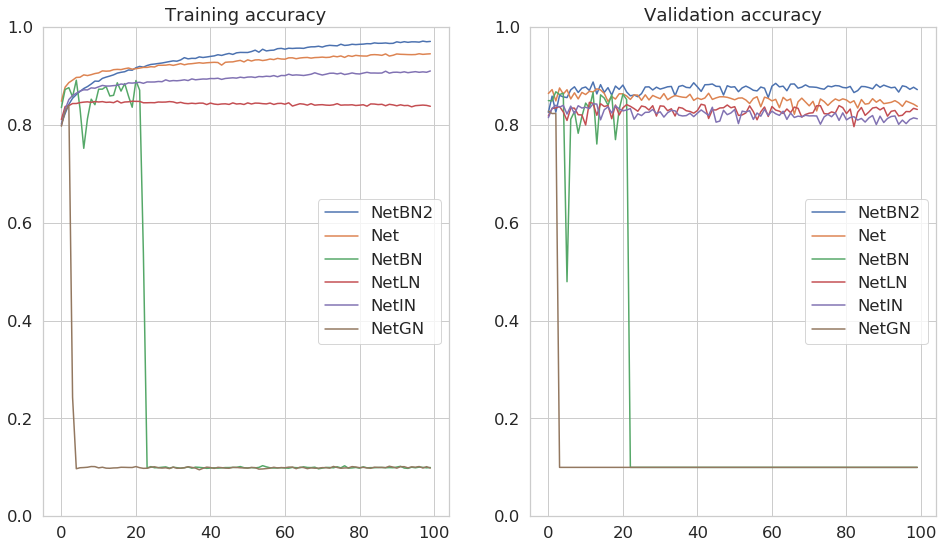

In [19]:
plt.figure(figsize=(16,9))
ax1=plt.subplot(121)
srtd = sorted(zip(model_names,results), key=lambda x: max(x[1][3]))[::-1]
for n, history in srtd:
    plt.plot(history[2], label=n)
    plt.title('Training accuracy')
    plt.legend()
    plt.ylim(0,1)
plt.subplot(122, sharey=ax1)
for n, history in srtd:
    plt.plot(history[3], label=n)
    plt.title('Validation accuracy')
    plt.legend();
    plt.ylim(0,1)